## Problem Statement:

#### Using different techniques of Machine Learning, we need to build a Recommender System that recommends movies based on “ Cast, Genre, Reviews, TMDB/IMDB ratings”

Using different types of recommendation techniques like:
  1. **Popularity based recommender system**
  2. **Content based Recommender System**
  3. **Collaborative Recommender System** 
  4. **Hybrid Recomender System**

### About the Dataset:🎬

The dataset consists of  metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.


## Dataset Description: 📝

This dataset consists of the following files:

- **Movies_metadata.csv:** The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

- **Keywords.csv:** Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

- **Credits.csv:** Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

- **Links.csv:** The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

- **Links_small.csv:** Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.
- **Ratings_small.csv:** The subset of 100,000 ratings from 700 users on 9,000 movies.


## Dataset:📂

https://www.kaggle.com/rounakbanik/movie-recommender-systems/data

I will build a Content Based Recomender System using movies from the Full Dataset whereas all personalised recommender systems will make use of the small dataset  As a first step, I will build Content based recommender system.




##### Before starting to actual work on the Movie Recommendations Let's Understand the What is Movie Recomendtation and Types of Recomendations

### What is Recomendation System ?

Recommendation systems are becoming increasingly important in today’s extremely busy world. People are always short on time with the myriad tasks they need to accomplish in the limited 24 hours. Therefore, the recommendation systems are important as they help them make the right choices, without having to expend their cognitive resources.

The purpose of a recommendation system basically is to search for content that would be interesting to an individual. Moreover, it involves a number of factors to create personalised lists of useful and interesting content specific to each user/individual. Recommendation systems are Artificial Intelligence based algorithms that skim through all possible options and create a customized list of items that are interesting and relevant to an individual. These results are based on their profile, search/browsing history, what other people with similar traits/demographics are watching, and how likely are you to watch those movies. This is achieved through predictive modeling and heuristics with the data available.

### Why Recommendation systems?

- They help the user find items of their interest
- Helps the item provider to deliver their items to the right user
- To identify the most relevant products for each use
- Showcase personalised content to each user
- Websites can improve user-engagement
- It increases revenues for business through increased consumption

### Various types of recommendation systems?

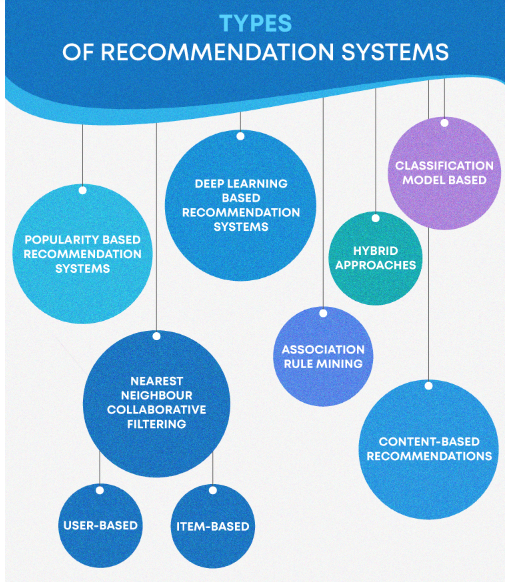


#### What is Content Based Recomender System??

It based on information on the content of items rather than on other users’ opinions.Uses a machine learning algorithm to induce a profile of the users preferences from examples based on a feature description of content.
It suggest the  simillar item based on particular item. In this system, keywords are used to describe the items, and a user profile is built to indicate the type of item this user likes.Content-based recommender systems can also include opinion-based recommender systems
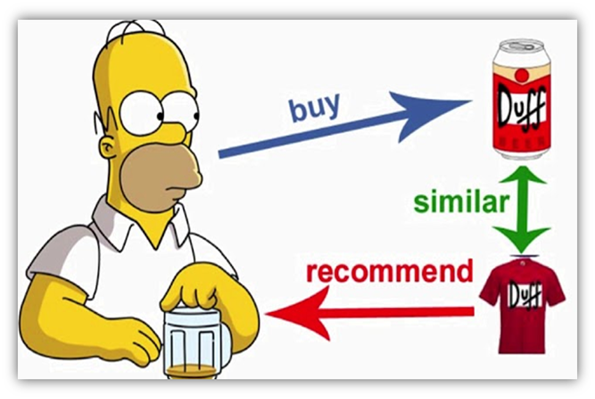


## Importing required Liabraries

In [1]:
import numpy as np # for numrical caluation analysis
import pandas as pd # for data wrangling
import warnings
warnings.filterwarnings('ignore')

In [2]:
Movies_Data=pd.read_csv("movies_metadata.csv")

In [3]:
print('No. of Rows:', Movies_Data.shape[0])
print('No. of Columns:',Movies_Data.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns 
Movies_Data.head(2)

No. of Rows: 45466
No. of Columns: 24


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [4]:
Keywords_Data=pd.read_csv("keywords.csv")
print('No. of Rows:', Keywords_Data.shape[0])
print('No. of Columns:',Keywords_Data.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns 
Keywords_Data.head()

No. of Rows: 46419
No. of Columns: 2


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


## Data Intigrity Check

In [5]:
Keywords_Data.info()  # for checking the datatypes and value count of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [6]:
Keywords_Data.isnull().sum() # to check the null value present in the dataset or not

id          0
keywords    0
dtype: int64

In [7]:
Keywords_Data.duplicated(subset='id').sum() # to find the duplicate value available in the dataframe

987

In [8]:
# Droping the Duplicates value 
Keywords_Data.drop_duplicates(subset ="id",keep = 'first', inplace = True) 

In [9]:
Keywords_Data.duplicated(subset='id').sum() # to find the duplicate value available in the dataframe

0

In [10]:
Keywords_Data.info() # to check the datashape and datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45432 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45432 non-null  int64 
 1   keywords  45432 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [11]:
Movies_Data.duplicated(subset='id').sum() # to find the duplicate value available in the dataframe

30

In [12]:
Movies_Data.drop_duplicates(subset ="id",keep = 'first', inplace = True) #to drop the duplicate value available in the dataframe

In [13]:
Movies_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45436 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45436 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45436 non-null  object 
 3   genres                 45436 non-null  object 
 4   homepage               7777 non-null   object 
 5   id                     45436 non-null  object 
 6   imdb_id                45419 non-null  object 
 7   original_language      45425 non-null  object 
 8   original_title         45436 non-null  object 
 9   overview               44482 non-null  object 
 10  popularity             45431 non-null  object 
 11  poster_path            45050 non-null  object 
 12  production_companies   45433 non-null  object 
 13  production_countries   45433 non-null  object 
 14  release_date           45349 non-null  object 
 15  re

In [14]:
Movies_Data = Movies_Data.drop([19730, 29503, 35587])

In [15]:
# using astype command converting data of ID feature into integer 
Movies_Data['id']= Movies_Data['id'].astype(int)

In [16]:
Movies_Data.info() #for checking the datatypes and value count of features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45433 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45433 non-null  object 
 1   belongs_to_collection  4488 non-null   object 
 2   budget                 45433 non-null  object 
 3   genres                 45433 non-null  object 
 4   homepage               7774 non-null   object 
 5   id                     45433 non-null  int32  
 6   imdb_id                45416 non-null  object 
 7   original_language      45422 non-null  object 
 8   original_title         45433 non-null  object 
 9   overview               44479 non-null  object 
 10  popularity             45430 non-null  object 
 11  poster_path            45047 non-null  object 
 12  production_companies   45430 non-null  object 
 13  production_countries   45430 non-null  object 
 14  release_date           45346 non-null  object 
 15  re

In [17]:
Movies_Data['id'].nunique() # to check the unique values 

45433

In [18]:
Movies_Data.duplicated(subset='id', keep='first') # to find the duplicates values

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Length: 45433, dtype: bool

In [19]:
Movies=Movies_Data.merge(Keywords_Data, on='id') # merging the two dataframe on common feature of id.

In [20]:
Movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [21]:
Credits_Data=pd.read_csv('credits.csv') # importing Credits.csv dataframe
print('No. of Rows:', Credits_Data.shape[0])
print('No. of Columns:',Credits_Data.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns 
Credits_Data.head()

No. of Rows: 45476
No. of Columns: 3


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [22]:
Movies=Movies.merge(Credits_Data, on='id') # Merging the two dataframe on ID as its a common feature in the dataframe.

In [23]:
Movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [24]:
Movies.isnull().sum() # to Find the Null value available in the dataset

adult                        0
belongs_to_collection    40982
budget                       0
genres                       0
homepage                 37694
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25061
title                        3
video                        3
vote_average                 3
vote_count                   3
keywords                     0
cast                         0
crew                         0
dtype: int64

In [25]:
Movies.to_csv('Movies_Preprocessed_data.csv') # to save the dataframe in new csv file

In [26]:
Movies = pd.read_csv('Movies_Preprocessed_data.csv') # imorting the dataframe

In [27]:
# drop unnecessary columns
Movies.drop(columns ='Unnamed: 0', inplace =True )

In [28]:
Movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."


# List of features which we are considering for Explanatory Data Analysis:
1. budget
2. genres
3. original_Language
4. title
5. id
6. keywords
7. cast
8. revenue
9. popularity
10. crew
11. Release_date


In [29]:
# creating Masking List of Features to use in futher data analysis 
Movies = Movies[['id','title','overview','genres','keywords','cast','crew','budget','revenue','popularity','original_language','vote_count','vote_average','release_date','runtime']]

In [30]:
Movies.head(3)

,id,title,overview,genres,keywords,cast,crew,budget,revenue,popularity,original_language,vote_count,vote_average,release_date,runtime
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",30000000,373554033.0,21.946943,en,5415.0,7.7,1995-10-30,81.0
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",65000000,262797249.0,17.015539,en,2413.0,6.9,1995-12-15,104.0
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",0,0.0,11.712900,en,92.0,6.5,1995-12-22,101.0


In [31]:
Movies.isnull().sum() # to find the null value available in the dataset

id                     0
title                  3
overview             954
genres                 0
keywords               0
cast                   0
crew                   0
budget                 0
revenue                3
popularity             3
original_language     11
vote_count             3
vote_average           3
release_date          87
runtime              260
dtype: int64

In [32]:
# Dropping missing values
Movies.dropna(inplace=True)

## Data Cleaning

- **Literal_eval:**

Literal_eval method is one of the helper functions that helps traverse an abstract syntax tree. This function evaluates an expression node or a string consisting of a Python literal or container display.

- **Abstract Syntax Tree(ast)**

The ast module helps Python applications to process trees of the Python abstract syntax grammar. The abstract syntax itself might change with each Python release; this module helps to find out programmatically what the current grammar looks like.

An abstract syntax tree can be generated by passing ast.PyCF_ONLY_AST as a flag to the compile() built-in function, or using the parse() helper provided in this module. The result will be a tree of objects whose classes all inherit from ast.AST. An abstract syntax tree can be compiled into a Python code object using the built-in compile() function.

In [33]:
# defining the Literal_ eval function to remove the space 
def fetch_director(text):
    M = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            M.append(i['name'])
    return M

In [34]:
import ast

In [35]:
# Applying literal_eval for 'Crew' feature

Movies['crew'] = Movies['crew'].apply(fetch_director)

In [36]:
Movies.head(3)

,id,title,overview,genres,keywords,cast,crew,budget,revenue,popularity,original_language,vote_count,vote_average,release_date,runtime
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...",[John Lasseter],30000000,373554033.0,21.946943,en,5415.0,7.7,1995-10-30,81.0
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...",[Joe Johnston],65000000,262797249.0,17.015539,en,2413.0,6.9,1995-12-15,104.0
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...",[Howard Deutch],0,0.0,11.712900,en,92.0,6.5,1995-12-22,101.0


In [37]:

def convert5(text):
    M = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 5:
            M.append(i['name'])
        counter+=1
    return M

In [38]:
Movies['cast'] = Movies['cast'].apply(convert5)
Movies.head()

,id,title,overview,genres,keywords,cast,crew,budget,revenue,popularity,original_language,vote_count,vote_average,release_date,runtime
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],30000000,373554033.0,21.946943,en,5415.0,7.7,1995-10-30,81.0
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10090, 'name': 'board game'}, {'id': 1...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],65000000,262797249.0,17.015539,en,2413.0,6.9,1995-12-15,104.0
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],0,0.0,11.712900,en,92.0,6.5,1995-12-22,101.0
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker],16000000,81452156.0,3.859495,en,34.0,6.1,1995-12-22,127.0
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer],0,76578911.0,8.387519,en,173.0,5.7,1995-02-10,106.0


In [39]:
import ast

In [40]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [41]:
Movies['genres'] = Movies['genres'].apply(convert)
Movies.head()

,id,title,overview,genres,keywords,cast,crew,budget,revenue,popularity,original_language,vote_count,vote_average,release_date,runtime
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],30000000,373554033.0,21.946943,en,5415.0,7.7,1995-10-30,81.0
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]","[{'id': 10090, 'name': 'board game'}, {'id': 1...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],65000000,262797249.0,17.015539,en,2413.0,6.9,1995-12-15,104.0
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[Romance, Comedy]","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],0,0.0,11.712900,en,92.0,6.5,1995-12-22,101.0
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","[{'id': 818, 'name': 'based on novel'}, {'id':...","[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker],16000000,81452156.0,3.859495,en,34.0,6.1,1995-12-22,127.0
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,[Comedy],"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer],0,76578911.0,8.387519,en,173.0,5.7,1995-02-10,106.0


In [42]:
Movies['keywords'] = Movies['keywords'].apply(convert)
Movies.head(3)

,id,title,overview,genres,keywords,cast,crew,budget,revenue,popularity,original_language,vote_count,vote_average,release_date,runtime
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],30000000,373554033.0,21.946943,en,5415.0,7.7,1995-10-30,81.0
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],65000000,262797249.0,17.015539,en,2413.0,6.9,1995-12-15,104.0
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],0,0.0,11.712900,en,92.0,6.5,1995-12-22,101.0


In [43]:
Movies_meta = Movies.copy() # saving dataframe in new instance

In [44]:
Movies= Movies_meta.copy()

In [45]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [46]:
Movies['crew'] = Movies['crew'].apply(collapse)

In [47]:
Movies['cast'] = Movies['cast'].apply(collapse)

In [48]:
Movies['genres'] = Movies['genres'].apply(collapse)
Movies['keywords'] = Movies['keywords'].apply(collapse)

In [49]:
Movies['overview'] = Movies['overview'].apply(lambda x:x.split())

In [50]:
Movies['title_list'] = Movies['title'].apply(lambda x:x.split())

In [51]:
Movies.head(3)

,id,title,overview,genres,keywords,cast,crew,budget,revenue,popularity,original_language,vote_count,vote_average,release_date,runtime,title_list
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter],30000000,373554033.0,21.946943,en,5415.0,7.7,1995-10-30,81.0,"[Toy, Story]"
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]","[boardgame, disappearance, basedonchildren'sbo...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston],65000000,262797249.0,17.015539,en,2413.0,6.9,1995-12-15,104.0,[Jumanji]
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Romance, Comedy]","[fishing, bestfriend, duringcreditsstinger, ol...","[WalterMatthau, JackLemmon, Ann-Margret, Sophi...",[HowardDeutch],0,0.0,11.712900,en,92.0,6.5,1995-12-22,101.0,"[Grumpier, Old, Men]"


- **Combining features under new column Tags**

In [52]:
Movies['tags'] = Movies['overview']+ Movies['cast'] 
+ Movies['crew'] + Movies['keywords'] 
+ Movies["title_list"] + Movies['genres'] 

In [53]:
Movies.head(2)

,id,title,overview,genres,keywords,cast,crew,budget,revenue,popularity,original_language,vote_count,vote_average,release_date,runtime,title_list,tags
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter],30000000,373554033.0,21.946943,en,5415.0,7.7,1995-10-30,81.0,"[Toy, Story]","[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]","[boardgame, disappearance, basedonchildren'sbo...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston],65000000,262797249.0,17.015539,en,2413.0,6.9,1995-12-15,104.0,[Jumanji],"[When, siblings, Judy, and, Peter, discover, a..."


In [54]:
df=Movies.copy()

In [55]:
df['tags'] = df['tags'].apply(lambda x: " ".join(x))
df.head()

,id,title,overview,genres,keywords,cast,crew,budget,revenue,popularity,original_language,vote_count,vote_average,release_date,runtime,title_list,tags
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter],30000000,373554033.0,21.946943,en,5415.0,7.7,1995-10-30,81.0,"[Toy, Story]","Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]","[boardgame, disappearance, basedonchildren'sbo...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston],65000000,262797249.0,17.015539,en,2413.0,6.9,1995-12-15,104.0,[Jumanji],When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Romance, Comedy]","[fishing, bestfriend, duringcreditsstinger, ol...","[WalterMatthau, JackLemmon, Ann-Margret, Sophi...",[HowardDeutch],0,0.0,11.712900,en,92.0,6.5,1995-12-22,101.0,"[Grumpier, Old, Men]",A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Comedy, Drama, Romance]","[basedonnovel, interracialrelationship, single...","[WhitneyHouston, AngelaBassett, LorettaDevine,...",[ForestWhitaker],16000000,81452156.0,3.859495,en,34.0,6.1,1995-12-22,127.0,"[Waiting, to, Exhale]","Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",[Comedy],"[baby, midlifecrisis, confidence, aging, daugh...","[SteveMartin, DianeKeaton, MartinShort, Kimber...",[CharlesShyer],0,76578911.0,8.387519,en,173.0,5.7,1995-02-10,106.0,"[Father, of, the, Bride, Part, II]",Just when George Banks has recovered from his ...


-----------------------------------------------------------------------------------------------------------

## Explorative Data Analysis

#### Univeriate Analysis

(0.0, 2500.0)

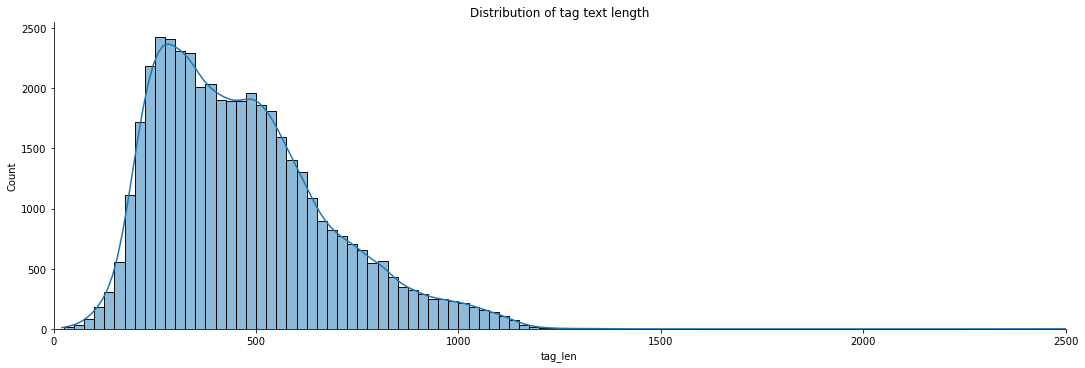

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
df['tag_len'] = df['tags'].apply(lambda x: len(x))

# illustrate the tag text length
sns.displot(data=df.dropna(), bins=list(range(0, 2000, 25)), height=5, x='tag_len',
            aspect=3, kde=True)
plt.title('Distribution of tag text length')
plt.xlim([0, 2500])

#### **Observation:**  above barchat shows text length is varies between 0 t0 1250 words approximately.

<AxesSubplot:xlabel='vote_count', ylabel='count'>

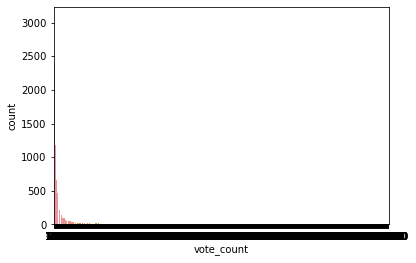

In [57]:
sns.countplot(df['vote_count'])

In [58]:
a = list(df['title'].value_counts())
b = list(df['title'].unique())
top_20_Movies = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['title', 'vote_count'])
top_20_Movies

,title,vote_count
0,Toy Story,11
1,Jumanji,9
2,Grumpier Old Men,8
3,Waiting to Exhale,8
4,Father of the Bride Part II,8
5,Heat,7
6,Sabrina,7
7,Tom and Huck,7
8,Sudden Death,6
9,GoldenEye,6


#### Bi-Variate Analysis

<AxesSubplot:xlabel='title', ylabel='vote_count'>

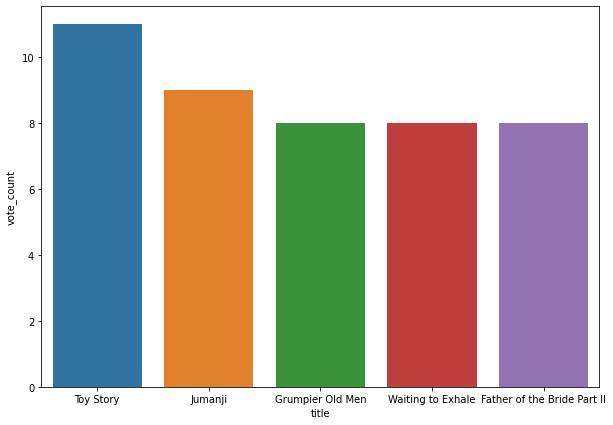

In [59]:
#Barplot of top 20 movies.

plt.figure(figsize=(10,7))
sns.barplot(x=top_20_Movies['title'].head(5),y=top_20_Movies['vote_count'].head())

**Insights:**
-  Toy Story has maximum vote of  around 11.5 followed by Jumanji which having 8.5 vote.
-  other movies having the vote count of 8 , followed by 6.
    

In [60]:
vote_mean_count = pd.DataFrame(df.groupby('title')['popularity'].mean())

In [61]:
vote_mean_count['vote_count']=pd.DataFrame(df.groupby('title')['popularity'].count())

<AxesSubplot:>

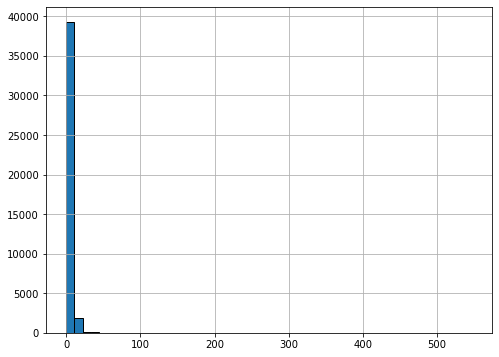

In [62]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
vote_mean_count['popularity'].hist(bins=50)

**Popularity score is  less than 100.**

In [63]:
# lets check the values in the language column
df['original_language'].value_counts()

en    32145
fr     2279
ja     1346
it     1264
de      963
      ...  
jv        1
qu        1
la        1
fy        1
si        1
Name: original_language, Length: 89, dtype: int64

In [64]:
# Looking at the above output we can easily observe that out of 3,500 movies only 150 movies are of other languages

# so it is better to keep only two languages that is English and Foreign
def language(x):
    if x == 'en':
        return 'en'
    else:
        return 'Foreign'

# lets apply the function on the language column
df['original_language'] = df['original_language'].apply(language)

# lets check the values again
df['original_language'].value_counts()

en         32145
Foreign    12293
Name: original_language, dtype: int64

- Insights:
**In the given dataset almost 32000 movies release in English Language.**

In [65]:
df['genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45470        [Drama, Action, Romance]
45472                         [Drama]
45473       [Action, Drama, Thriller]
45474                              []
45475                              []
Name: genres, Length: 44438, dtype: object

   index                           title  popularity
0  30720                         Minions  547.488298
1  33377                    Wonder Woman  294.337037
2  42236            Beauty and the Beast  287.253654
3  43657                     Baby Driver  228.032744
4  24467                      Big Hero 6  213.849907
5  26589                        Deadpool  187.860492
6  26591  Guardians of the Galaxy Vol. 2  185.330992
7  14569                          Avatar  185.070892
8  24363                       John Wick  183.870374
9  23686                       Gone Girl  154.801009


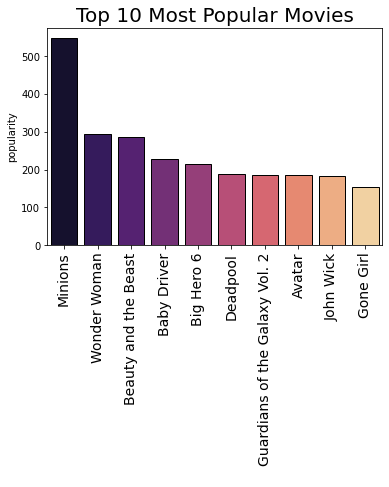

In [66]:
# lets also check the Top 10 Most Popular Movies on Social Media
x = df[['title','popularity']].sort_values(by = 'popularity',
                                                                ascending = False).head(10).reset_index()
print(x)

sns.barplot(x['title'], x['popularity'], palette = 'magma')
plt.title('Top 10 Most Popular Movies', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

**Insights**
1. "Minions" is most popular movie followed by wonder woman.
2. "Gone Giri" is less popular movie.


<Figure size 576x432 with 0 Axes>

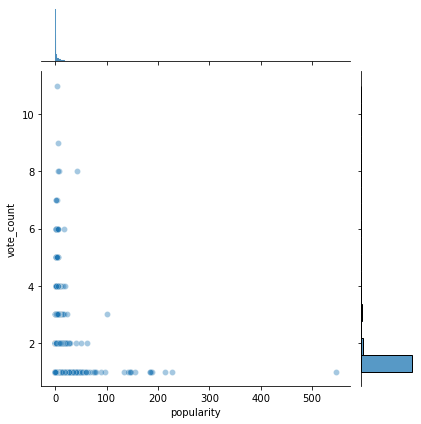

In [67]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='popularity', y='vote_count', data=vote_mean_count, alpha=0.4)

In [68]:
df.groupby('title')['popularity'].mean().sort_values(ascending=False).head()

title
Minions                           547.488298
Baby Driver                       228.032744
Big Hero 6                        213.849907
Deadpool                          187.860492
Guardians of the Galaxy Vol. 2    185.330992
Name: popularity, dtype: float64

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'vote_count'}>]], dtype=object)

<Figure size 576x432 with 0 Axes>

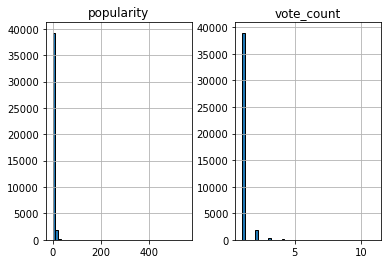

In [69]:
plt.figure(figsize=(8,6))
vote_mean_count.hist(bins=50)

## Feature Engineering

In [70]:
# Lets convert the gross and budget from $ to Million $ to make our analysis easier

df['revenue'] = df['revenue']/1000000
df['budget'] = df['budget']/1000000

In [71]:
# lets create a Profit column using the Budget and Revenue

df['Profit'] = df['revenue'] - df['budget']

# lets also check the name of Top 10 Profitable Movies
df[['Profit','title']].sort_values(by = 'Profit', ascending  = False).head(10)

,Profit,title
14569,2550.965087,Avatar
26580,1823.223624,Star Wars: The Force Awakens
1641,1645.034188,Titanic
25095,1363.528810,Jurassic World
28854,1316.249360,Furious 7
17836,1299.557910,The Avengers
17455,1217.000000,Harry Potter and the Deathly Hallows: Part 2
26583,1125.403694,Avengers: Age of Ultron
22124,1124.219009,Frozen
42236,1102.886337,Beauty and the Beast


In [72]:
# Lets check the Top 10 Profitable Movies Again
df[['title','Profit']].sort_values(by = 'Profit', ascending  = False).head()

,title,Profit
14569,Avatar,2550.965087
26580,Star Wars: The Force Awakens,1823.223624
1641,Titanic,1645.034188
25095,Jurassic World,1363.528810
28854,Furious 7,1316.249360


In [73]:
df.head(1)

,id,title,overview,genres,keywords,cast,crew,budget,revenue,popularity,original_language,vote_count,vote_average,release_date,runtime,title_list,tags,tag_len,Profit
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter],30.0,373.554033,21.946943,en,5415.0,7.7,1995-10-30,81.0,"[Toy, Story]","Led by Woody, Andy's toys live happily in his ...",480,343.554033


In [74]:
df['year'] = pd. DatetimeIndex(df['release_date']). year

In [75]:
df['year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 44438 entries, 0 to 45475
Series name: year
Non-Null Count  Dtype
--------------  -----
44438 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB


Most Profitable Years


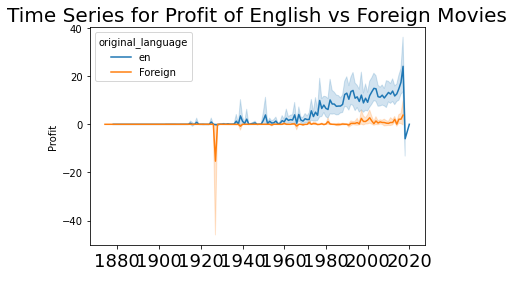

In [76]:
# lets convert year into integer
print('Most Profitable Years')
display(df[['year','original_language','Profit']].groupby(['original_language',
                                    'year']).agg('sum').sort_values(by = 'Profit',
                                     ascending = False).head(10).style.background_gradient(cmap = 'Greens'))

# lets plot them
sns.lineplot(df['year'], df['Profit'], hue = df['original_language'])
plt.title('Time Series for Profit of English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()

In [77]:
print("Movies that Made Huge Losses")
display(df[df['Profit'] < -100][['title',
                        'original_language','Profit']].style.background_gradient(cmap = 'Reds'))

Movies that Made Huge Losses


,title,original_language,Profit
7235,The Alamo,en,-119.180039
14841,The Wolfman,en,-150.000000
16805,Mars Needs Moms,en,-111.007242
21190,The Lone Ranger,en,-165.710090
27680,The Pacific,en,-120.000000
30754,Double Wedding,en,-104.002432
32869,Pokémon the Movie: Hoopa and the Clash of Ages,Foreign,-150.000000
43203,Band of Brothers,en,-125.000000
44350,Valerian and the City of a Thousand Planets,en,-107.447384


In [78]:
# The Duration of Movies is not varying a lot but we know that most of the users either like watching long movies or short 
# duration movies. we can categorize the movies in two part i.e., short and long.

# lets define a function for categorizing Duration of Movies
def runtime(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    
# lets apply this function on the duration column
df['runtime'] = df['runtime'].apply(runtime)

# lets check the values of Duration column
df['runtime'].value_counts()

Short    39448
Long      4990
Name: runtime, dtype: int64

,title,runtime,revenue,Profit
14569,Avatar,Long,2787.965087,2550.965087
26580,Star Wars: The Force Awakens,Long,2068.223624,1823.223624
1641,Titanic,Long,1845.034188,1645.034188
25095,Jurassic World,Long,1513.528810,1363.528810
28854,Furious 7,Long,1506.249360,1316.249360


,title,runtime,revenue,Profit
22124,Frozen,Short,1274.219009,1124.219009
30720,Minions,Short,1156.730962,1082.730962
44022,Despicable Me 3,Short,1020.063384,940.063384
21177,Despicable Me 2,Short,970.761885,894.761885
36270,Zootopia,Short,1023.784195,873.784195


Text(0.5, 1.0, 'Revenue Comparison')

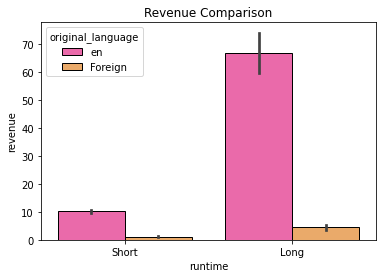

In [79]:
display(df[df['runtime'] == 'Long'][['title', 'runtime', 'revenue',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))

display(df[df['runtime'] == 'Short'][['title', 'runtime', 'revenue',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))

sns.barplot(df['runtime'], df['revenue'], hue = df['original_language'], palette = 'spring')
plt.title('Revenue Comparison')

when movie have short time i.e. `less than 120 minutes` have less revenue generation than having long time duration i.e `more than 120 minutes`

In [80]:
df['genres'].dtype

dtype('O')

In [81]:
df['genres'].value_counts()

[Drama]                                         4908
[Comedy]                                        3371
[Documentary]                                   2675
[]                                              2136
[Drama, Romance]                                1291
                                                ... 
[Adventure, Crime, Drama, Western]                 1
[Animation, Drama, ScienceFiction, Thriller]       1
[Comedy, Romance, Animation, Music]                1
[Fantasy, Music, Romance, Adventure]               1
[Family, Animation, Romance, Comedy]               1
Name: genres, Length: 4044, dtype: int64

- Droping unnecessary columns from dataframe

In [83]:
df1= df.drop(columns=['overview','genres','cast','crew','original_language','revenue','popularity','vote_count','vote_average','keywords','crew','budget','revenue','popularity','original_language','vote_count','vote_average','release_date','runtime','title_list','tag_len','Profit','year'])

In [84]:
df1.head(2)

,id,title,tags
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...


-----------------------------------------------------------------